<a href="https://colab.research.google.com/github/Nniikkoollaass/data-science-modul-7-HW/blob/main/Data_science_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Ми будемо працювати з датасетом "bikes_rent.csv",
# у якому по днях записані календарна інформація та погодні умови,
# що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день.

# Завдання 1
# Завантажте датасет за допомогою функції pandas.read_csv у змінну df.
# Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:
# Зчитуємо дані з файлу bikes_rent.csv
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:

season: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
yr: 0 — 2011, 1 — 2012
mnth: від 1 до 12
holiday: 0 — немає свята, 1 — є свято
weekday: від 0 до 6
workingday: 0 — неробочий день, 1 — робочий день
weathersit: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
temp: температура в Цельсіях
atemp: температура за відчуттями в Цельсіях
hum: вологість
windspeed(mph): швидкість вітру в милях за годину
windspeed(ms): швидкість вітру в метрах за секунду
cnt: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)
Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

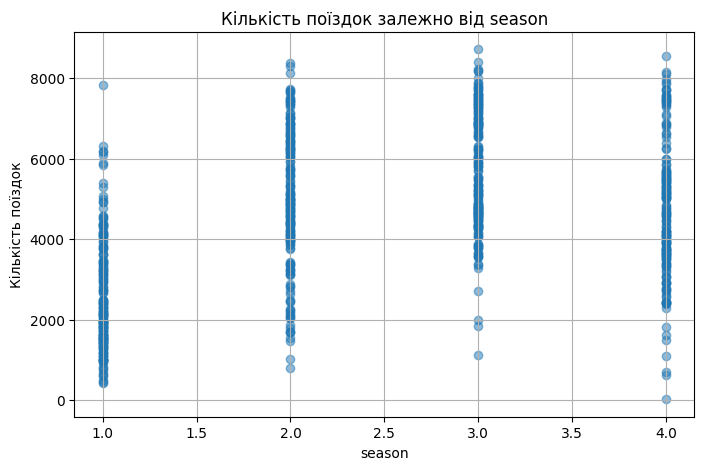

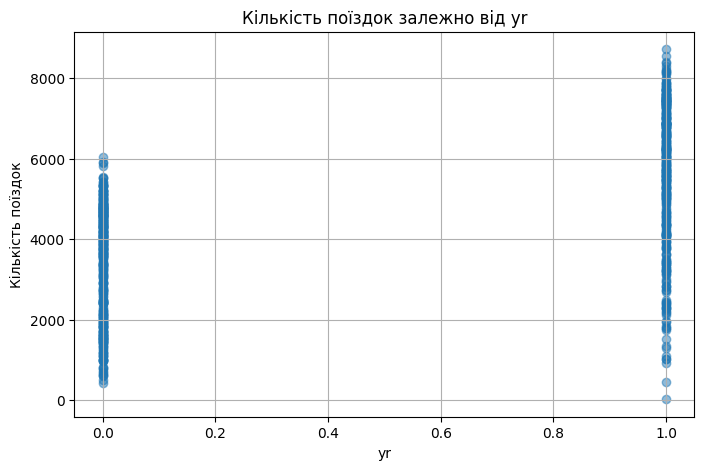

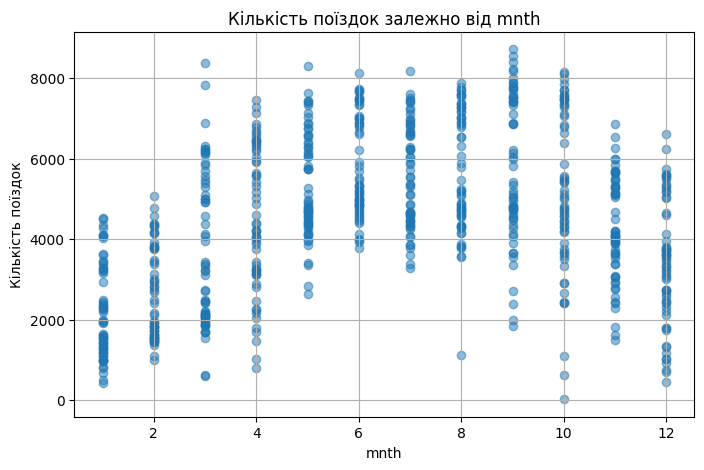

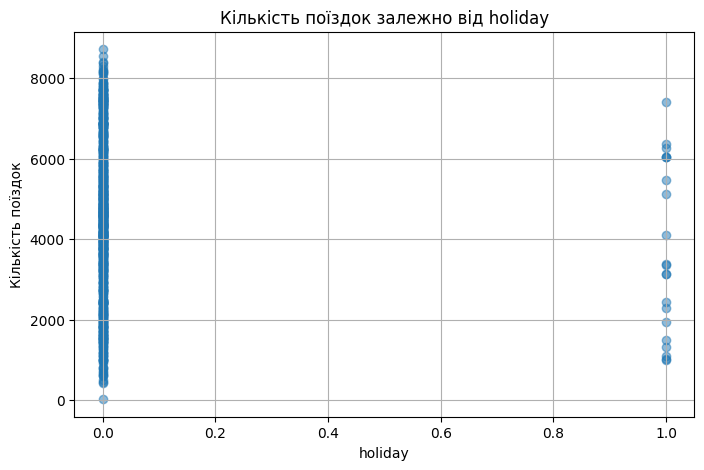

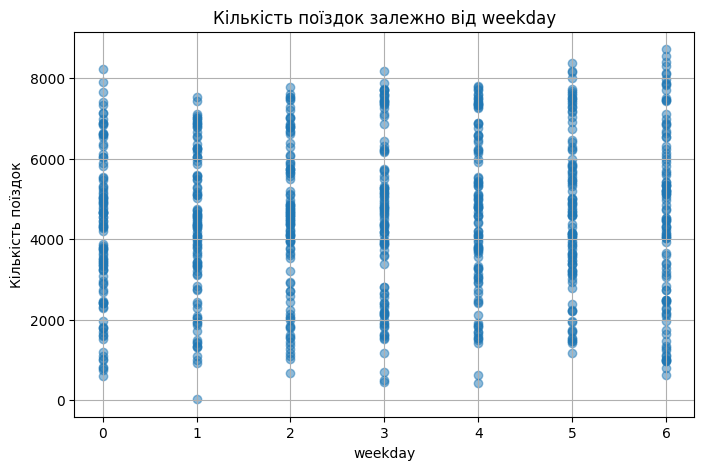

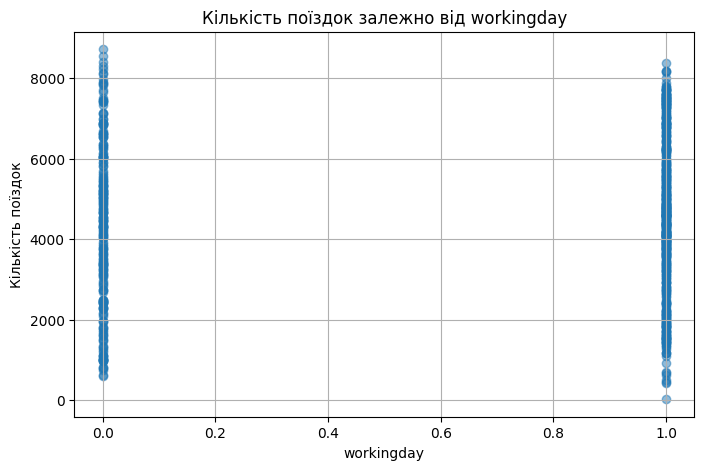

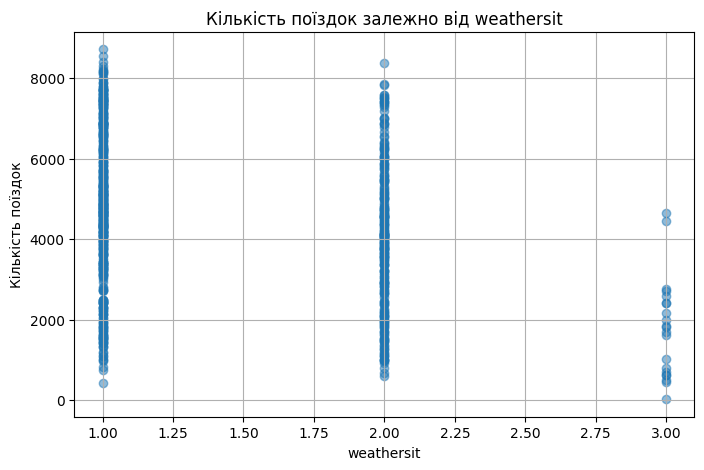

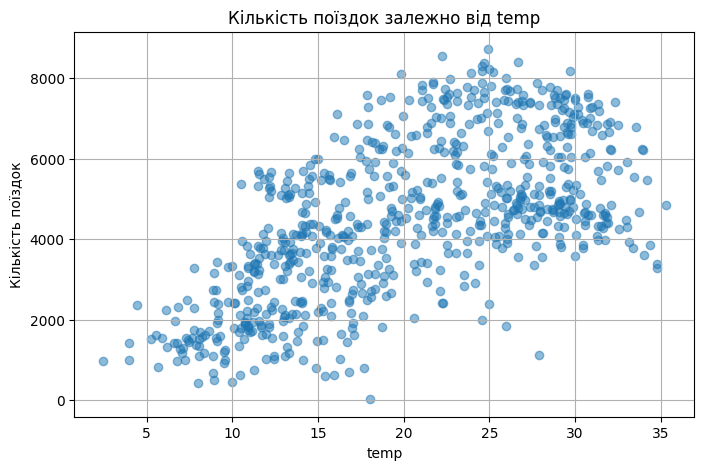

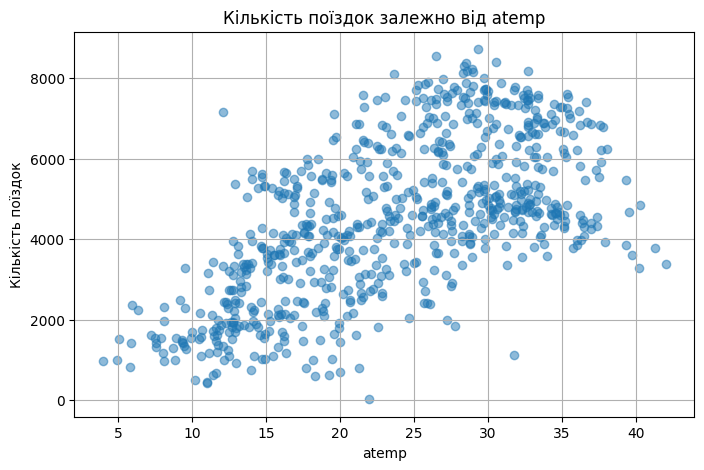

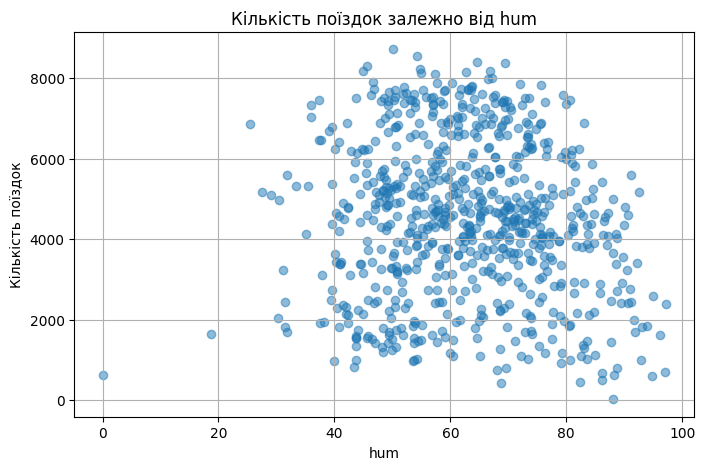

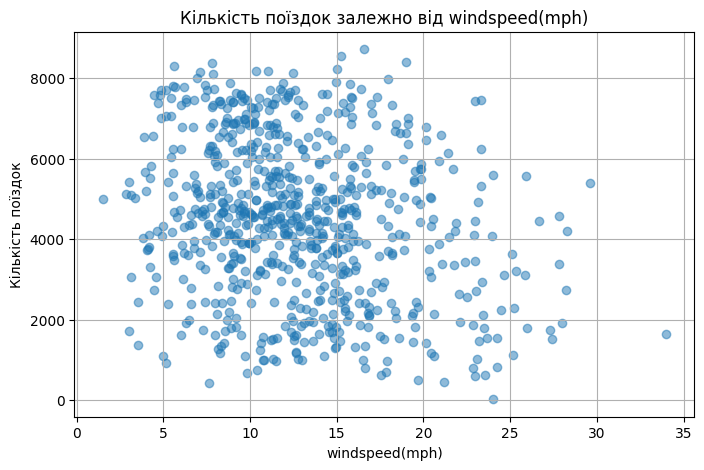

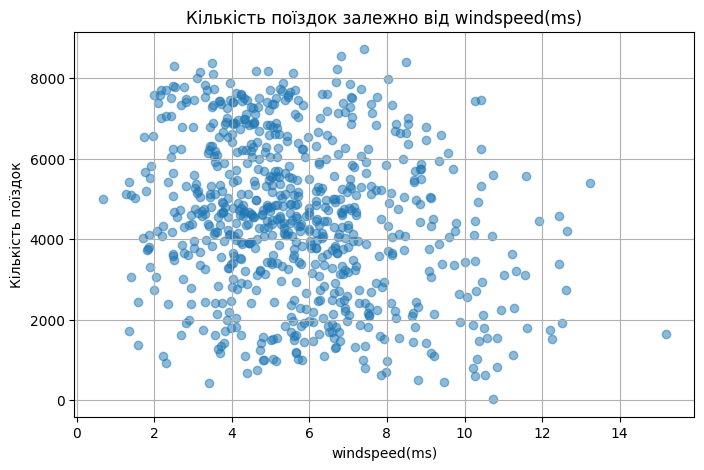

In [3]:
# Побудуйте графіки залежностей атрибутів від кількості поїздок.
# Іншими словами, вам потрібно побудувати 12 графіків.
# На кожному має бути зображена залежність чергового атрибута від змінної cnt.

# Створюємо список атрибутів, за якими будемо будувати графіки
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків
for attribute in attributes:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[attribute], df['cnt'], alpha=0.5)
    plt.title('Кількість поїздок залежно від {}'.format(attribute))
    plt.xlabel(attribute)
    plt.ylabel('Кількість поїздок')
    plt.grid(True)
    plt.show()


Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу corrwith.

In [4]:
# Обчислення кореляцій всіх ознак крім останньої з методом corr
feature_correlations = df.iloc[:, :-1].corr()

# Обчислення кореляції останньої ознаки з цільовою змінною з методом corrwith
target_correlation = df.iloc[:, :-1].corrwith(df['cnt'])

# Виведення кореляцій всіх ознак крім останньої
print("Кореляції всіх ознак крім останньої:")
print(feature_correlations)

# Виведення кореляції останньої ознаки з цільовою змінною
print("\nКореляція останньої ознаки з цільовою змінною:")
print(target_correlation)

Кореляції всіх ознак крім останньої:
                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
win

У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

In [5]:
# Вибираємо речові ознаки, які мають числові значення
numeric_features = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]

# Обчислюємо кореляції між речовими ознаками
numeric_correlations = numeric_features.corr()

# Виведення кореляцій між речовими ознаками
print("Кореляції між речовими ознаками:")
print(numeric_correlations)

Кореляції між речовими ознаками:
                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr:

In [6]:
# Обчислюємо всі можливі попарні кореляції між вказаними ознаками
# Вибірка вказаних ознак
selected_features = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]

# Обчислення попарних кореляцій
pairwise_correlations = selected_features.corr()

# Виведення попарних кореляцій
print("Попарні кореляції між ознаками:")
print(pairwise_correlations)

Попарні кореляції між ознаками:
                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


Завдання 4

Виведіть середні ознак.

In [7]:
# Обчислення середніх значень ознак
mean_features = df.mean()

# Виведення середніх значень ознак
print("Середні значення ознак:")
print(mean_features)

Середні значення ознак:
season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Створення та навчання моделі лінійної регресії - створює об'єкт моделі лінійної регресії
model = LinearRegression()
# після чого fit(X, y) навчає модель на наших дани
model.fit(X, y)

# Виведення ваг ознак
# Після навчання ми можемо вивести ваги ознак, які знаходяться в атрибуті coef_ моделі.
print("Ваги ознак:")
print(model.coef_)

Ваги ознак:
[ 5.70863796e+02  1.02196538e+03 -1.41301745e+02 -8.67593446e+01
  1.37225064e+02  5.63918818e+01 -3.30226462e+02  3.67483733e+02
  5.85549386e+02 -1.45614306e+02  1.24571384e+13 -1.24571384e+13]


Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns.

In [12]:
# Створення об'єкта лінійного регресора
regressor = LinearRegression()

# Навчання регресора на всіх даних
regressor.fit(X, y)

# Отримання ваг моделі
weights = regressor.coef_

# Виведення пар (назва ознаки, вага)
feature_names = df.columns[:-1]  # Назви ознак
for feature, weight in zip(feature_names, weights):
    print(feature, weight)

season 570.8637960129914
yr 1021.9653779400622
mnth -141.3017451148728
holiday -86.7593446245368
weekday 137.22506441350538
workingday 56.391881775973005
weathersit -330.2264620440312
temp 367.48373260182126
atemp 585.5493861188597
hum -145.61430569885857
windspeed(mph) 12457138390688.885
windspeed(ms) -12457138390887.346


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

w=(XTX)−1XTy

Якщо в X є колінеарні (лінійно-залежні) стовпці, матриця XTX стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація Xw≈y. Таку ситуацію називають проблемою мультиколінеарності.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають  L1  або  L2  норму ваг, помножену на коефіцієнт регуляризації  α . У першому випадку метод називається Lasso, а у другому — Ridge.

Завдання 6

Давайте спробуємо навчити лінійні моделі з L1 і L2-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з  L1 -регуляризацією (клас Lasso) і виведіть ваги.

In [13]:
from sklearn.linear_model import Lasso

# Створення об'єкта моделі Lasso
lasso_regressor = Lasso()

# Навчання моделі на всіх даних
lasso_regressor.fit(X, y)

# Виведення ваг моделі Lasso
print("Ваги моделі Lasso:")
print(lasso_regressor.coef_)

Ваги моделі Lasso:
[ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
  1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
  5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80514042e-08]


Навчіть лінійну модель з  L2 -регуляризацією (клас Ridge) і виведіть ваги.

In [14]:
from sklearn.linear_model import Ridge

# Створення об'єкта моделі Ridge
ridge_regressor = Ridge()

# Навчання моделі на всіх даних
ridge_regressor.fit(X, y)

# Виведення ваг моделі Ridge
print("Ваги моделі Ridge:")
print(ridge_regressor.coef_)

Ваги моделі Ridge:
[ 563.06457225 1018.94837879 -131.87332028  -86.746098    138.00511118
   55.90311038 -332.3497885   386.45788919  566.34704706 -145.0713273
  -99.25944108  -99.25944115]


Завдання 7

На відміну від L2-регуляризації, L1 обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації α.

Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги у список coefs_lasso, а потім навчіть Ridge і запишіть ваги у списокcoefs_ridge. Конвертуйте отримані списки в np.array.

In [16]:
# Значення коефіцієнта регуляризації
alphas = np.arange(1, 500, 50)

# Списки для зберігання ваг моделей
coefs_lasso = []
coefs_ridge = []

# Навчання моделей для кожного значення alpha
for alpha in alphas:
    # Навчання моделі Lasso
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

    # Навчання моделі Ridge
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

# Конвертація списків в np.array
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

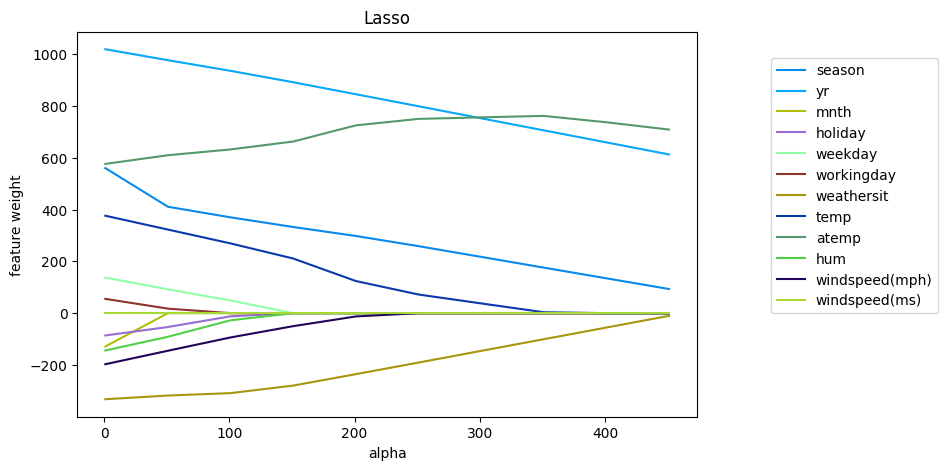

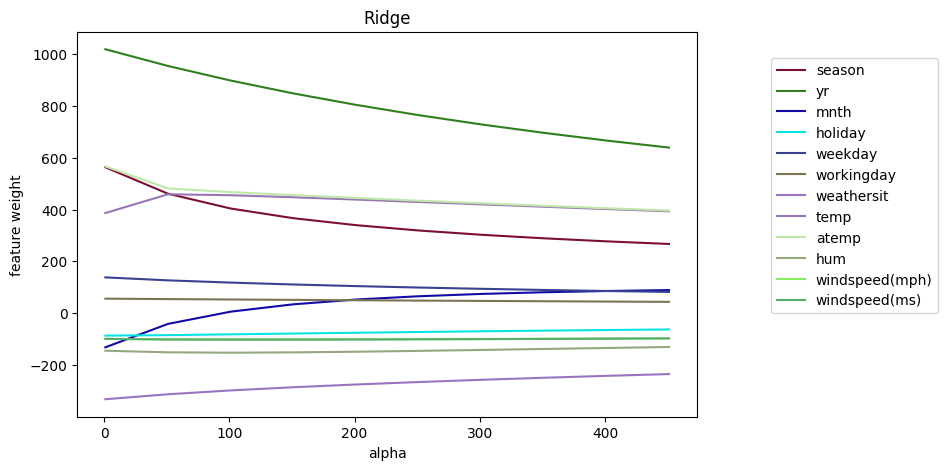

In [17]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1 - Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?

2 - Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.

3 -  можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший  10−3 .

4 - Який із регуляризаторів підійде для відбору неінформативних ознак?

Відповідь:

1 - Lasso на мою думку більш агресивніший. Бо наприклад season, temp зменшуються на графіку Lasso сильніше і швидше, ніж на графіку Ridge

2 - Збільшення alpha призведе до більшого зменшення ваг коефіцієнтів для Lasso. Це станеться через те, що функція втрат Lasso має "край" у нулі, тому великі значення alpha штрафують невеликі значення коефіцієнтів сильніше, і вони швидше зменшуються до нуля.

3 - Lasso виключає ознаку "windspeed" при alpha > 200 (приблизно більше 200), бо більше цього значення "windspeed" прямує до нуля.
Для Ridge ця ознака тримає приблизно однакове значення у всьому діапазоні доступних даних, тому для даного датасету Ridge не виключає ознаку "windspeed".

4 - На мою думку якщо треба відібрати неінформативні ознаки, то Lasso є кращим варіантом, оскільки він здатен зменшити ваги до нуля, тим самим виключаючи ці ознаки з моделі.

Завдання 8

Далі будемо працювати з Lasso.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто Mean Square Error.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати alpha за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на  K  частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, LassoCV, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну mse_path_, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha_ буде зберігатися вибране значення параметра регуляризації, а в coef_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. Побудуйте графік усередненого за рядками MSE в залежності від alpha (використовуйте для цього функцію create_plot).

Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [19]:
# Функція для побудови графіка
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = [e[0] for e in data]  # Перетворення на список
    y = [e[1] for e in data]  # Перетворення на список
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

1 - Імпортуємо необхідні бібліотеки та клас LassoCV.

2 - Визначяємо значення alphas, які ми будемо перевіряти для параметра регуляризації alpha.

3 - Створюємо екземпляр LassoCV і навчаємо його на даних, використовуючи різні значення alpha.

4 - Після навчання отримаємо оптимальне значення alpha та матрицю MSE для кожного alpha.

5 - Усереднюємо MSE для кожного alpha по рядках і будуємо графік залежності MSE від alpha.

6 - Виводимо оптимальне значення alpha та пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

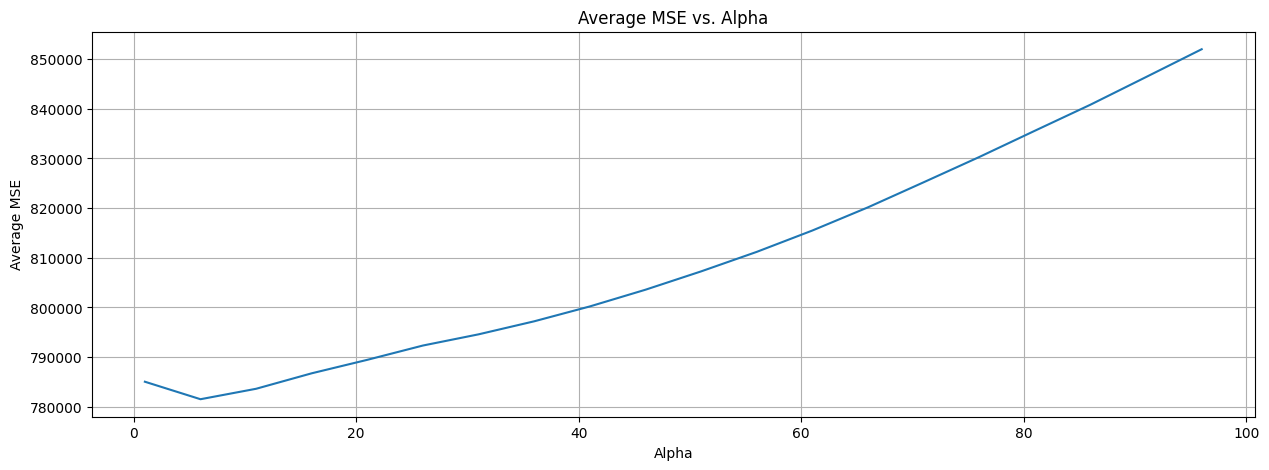

Optimal Alpha: 6
Feature Coefficients:
season: 532.0189828413535
yr: 1015.0602226430595
mnth: -100.03952614356629
holiday: -83.29395987529904
weekday: 132.50446549095795
workingday: 51.557085614073735
weathersit: -330.5598567399817
temp: 370.67985503003405
atemp: 581.396931065498
hum: -140.00740550068844
windspeed(mph): -191.77140847135036
windspeed(ms): -2.6854702314758792e-08


In [20]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

# Створення та навчання регресора LassoCV
regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)  # X - навчальні ознаки, y - цільова змінна

# Отримання оптимального alpha та матриці MSE для кожного alpha
optimal_alpha = regressor.alpha_
mse_values = np.mean(regressor.mse_path_, axis=1)

alphas = list(regressor.alphas_)  # Перетворення на список

# Побудова графіка усередненого за рядками MSE в залежності від alpha
create_plot(list(zip(alphas, mse_values)),
            title="Average MSE vs. Alpha",
            xlabel="Alpha",
            ylabel="Average MSE")

# Виведення оптимального alpha та пар "ознака-коефіцієнт"
print("Optimal Alpha:", optimal_alpha)
print("Feature Coefficients:")
for feature, coef in zip(df.columns, regressor.coef_):
    print(f"{feature}: {coef}")

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

Завдання 9

Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто за стовпцями). На трьох окремих графіках візуалізуйте стовпці mse_path_.

1 - Знаходимо мінімальне значення MSE на кожному розбитті (стовпці) mse_path_ та відповідне alpha.

2 - Будуємо три окремі графіки, де кожен графік буде відображати mse_path_ для відповідного розбиття.

Minimum MSE for fold 1: 6
Minimum MSE for fold 2: 1
Minimum MSE for fold 3: 51


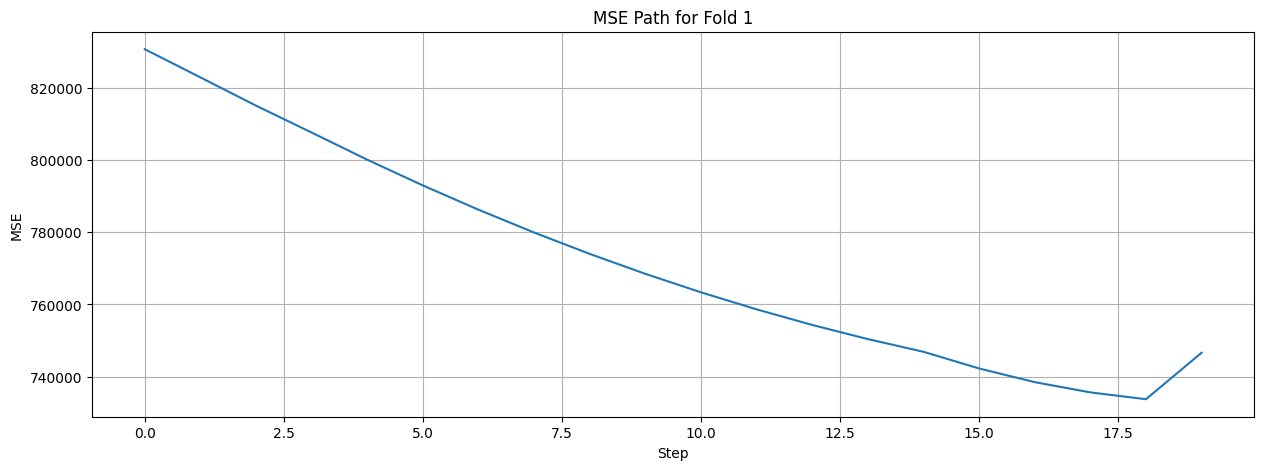

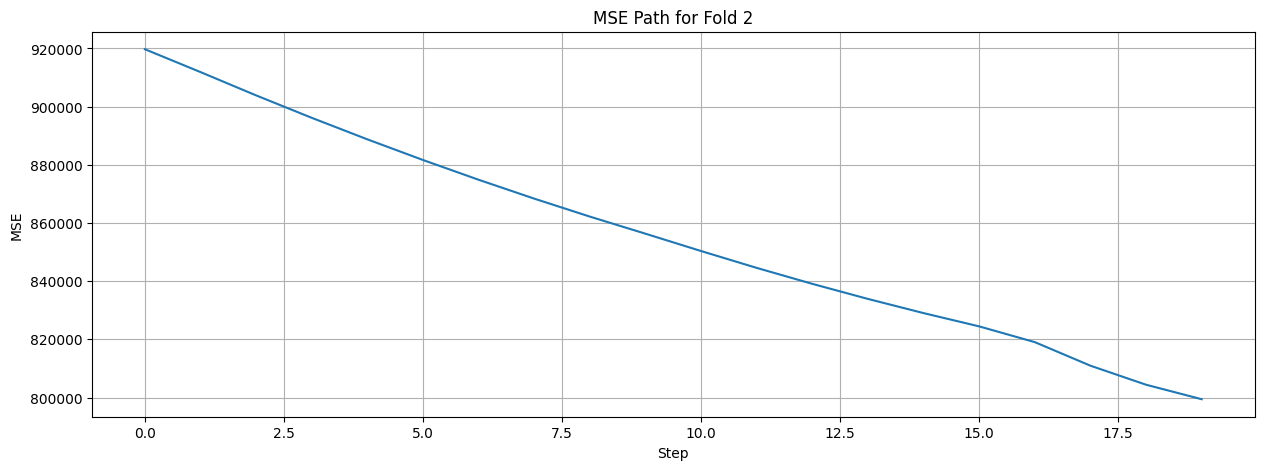

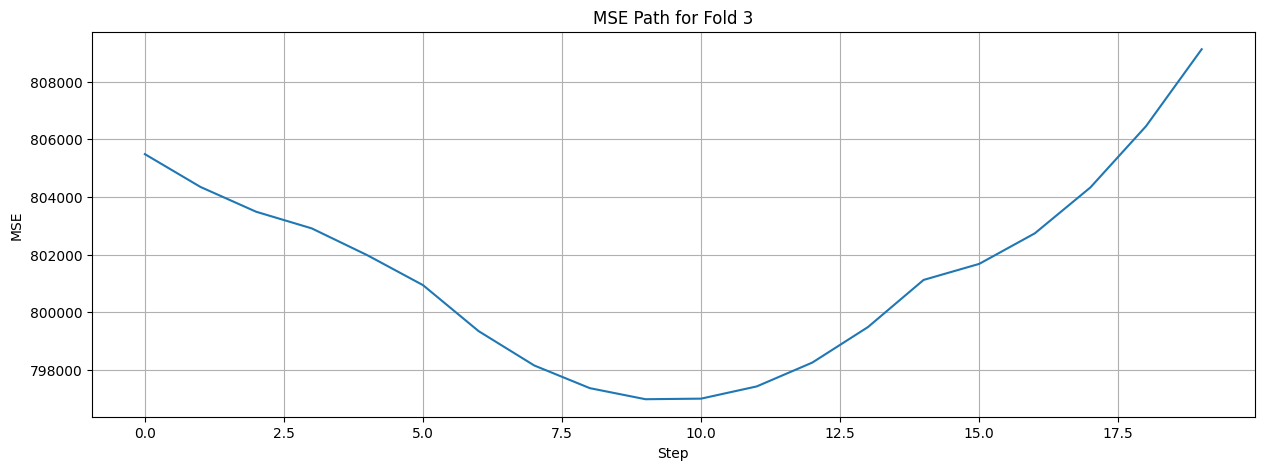

In [21]:
# Знайти мінімальне MSE на кожному розбитті та відповідне alpha
min_mse_indices = np.argmin(regressor.mse_path_, axis=0)
best_alphas = regressor.alphas_[min_mse_indices]

for i, alpha in enumerate(best_alphas):
    print(f"Minimum MSE for fold {i+1}: {alpha}")

# Побудувати графіки mse_path_ для кожного розбиття
for i in range(regressor.mse_path_.shape[1]):
    create_plot(list(enumerate(regressor.mse_path_[:, i])),
                title=f"MSE Path for Fold {i+1}",
                xlabel="Step",
                ylabel="MSE")

На кожному розбитті оптимальне значення alpha своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі alpha на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?*Курсив*

Щоб відповісти на це запитання, спочатку виберемо 4 ознаки з найбільшими позитивними коефіцієнтами у навченій моделі. Після цього ми можемо перевірити, чи спостерігається зростаюча лінійна залежність між цими ознаками і цільовою змінною cnt на візуалізаціях, які ми раніше робили.

Для вибору ознак і відображення їх залежностей від cnt використаємо код:
він визначає і виводить чотири ознаки з найбільшими позитивними коефіцієнтами, а потім будує графіки для кожної з цих ознак проти cnt.

Top 4 features with the largest positive coefficients: Index(['temp', 'season', 'atemp', 'yr'], dtype='object')


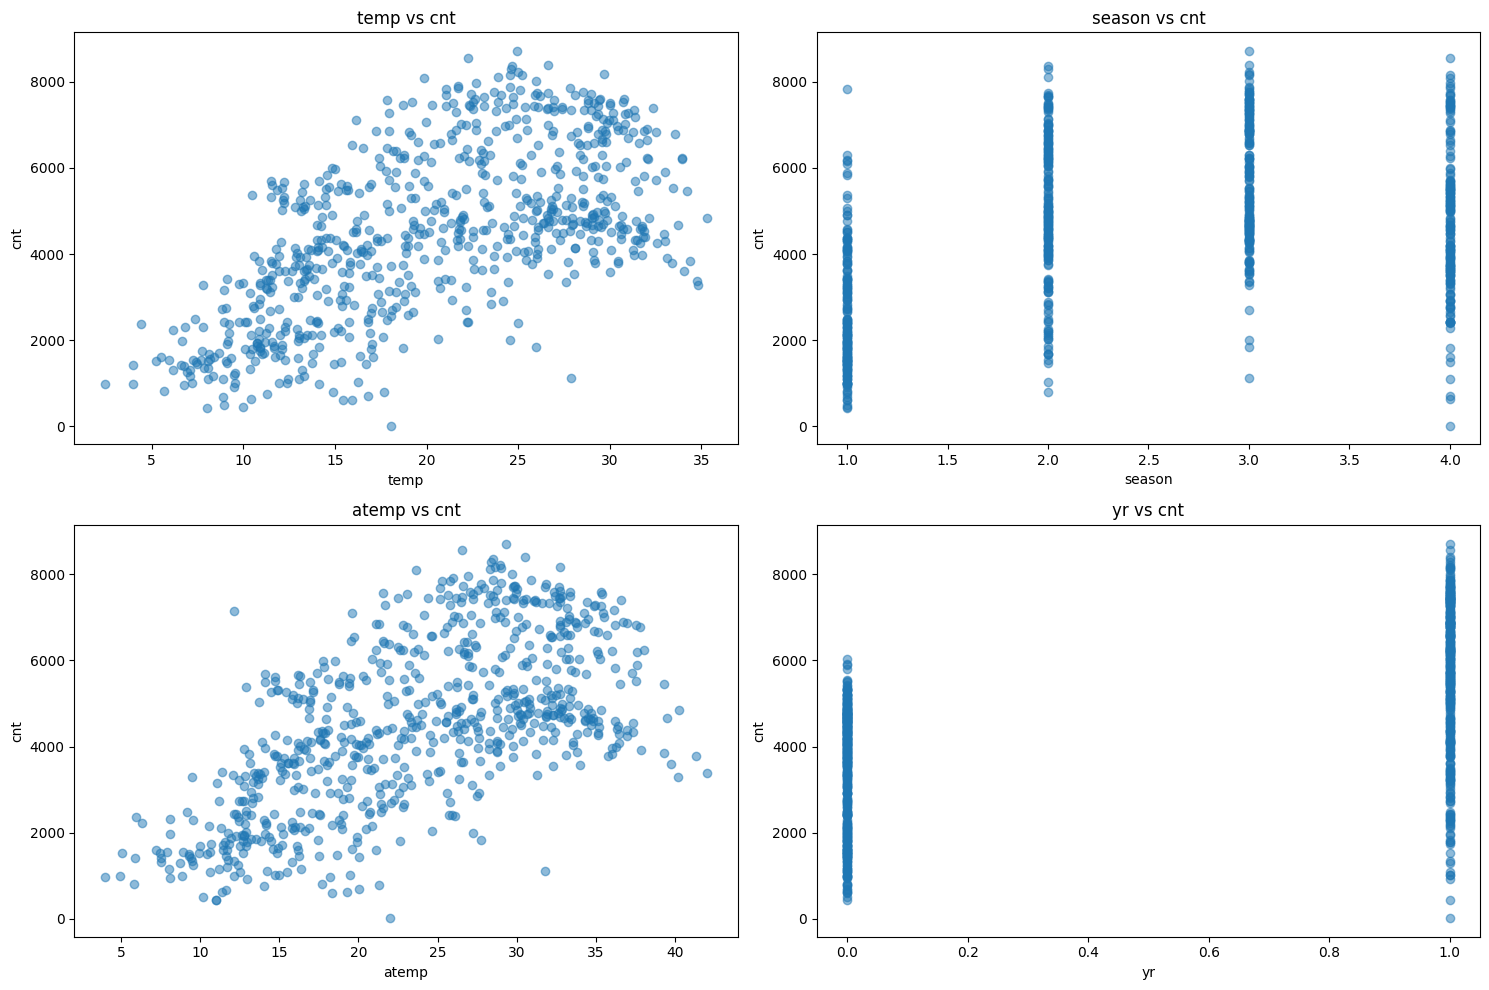

In [22]:
top_features_indices = np.argsort(regressor.coef_)[-4:]
top_features = df.columns[top_features_indices]
print("Top 4 features with the largest positive coefficients:", top_features)

# Plotting the dependencies of cnt on selected features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(top_features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df[feature], df['cnt'], alpha=0.5)
    axs[row, col].set_title(f'{feature} vs cnt')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('cnt')

plt.tight_layout()
plt.show()

Відповідь:

Після оцінки графіків можна візуально можна припустити, що спостерігається зростаюча лінійна залежність між цими ознаками та cnt. Видається, що залежність виглядає логічною, при збільшенні значення ознаки супроводжується збільшення значення cnt, тому робимо висновок, що збільшення цих ознак сприяє збільшенню попиту на велосипеди.

Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

Щоб відповісти на це запитання, спочатку вибераємо три ознаки з найбільшими за модулем негативними коефіцієнтами у навченій моделі. Після цього ми перевіримо, чи спостерігається зменшення лінійної залежності між цими ознаками і цільовою змінною cnt на візуалізаціях.

Для вибору ознак і відображення їх залежностей від cnt використаємо код:
він визначає і виводить три ознаки з найбільшими за модулем негативними коефіцієнтами, а потім будує графіки для кожної з цих ознак проти cnt.

Top 3 features with the largest negative coefficients (by magnitude): Index(['windspeed(ms)', 'workingday', 'holiday'], dtype='object')


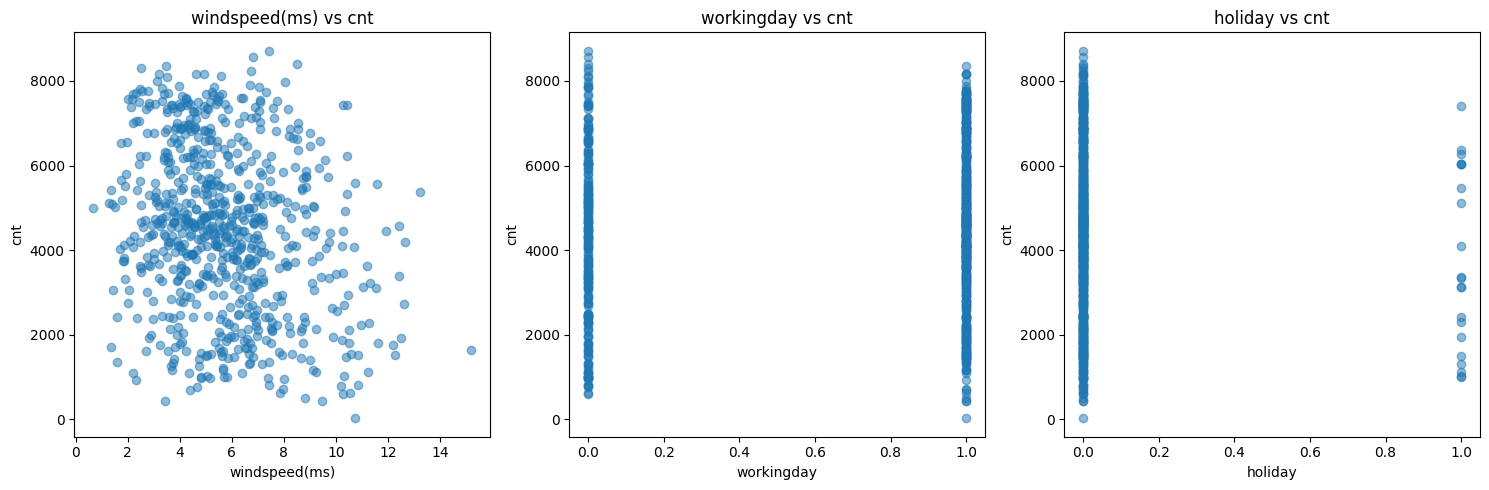

In [23]:
top_negative_features_indices = np.argsort(np.abs(regressor.coef_))[:3]
top_negative_features = df.columns[top_negative_features_indices]
print("Top 3 features with the largest negative coefficients (by magnitude):", top_negative_features)

# Plotting the dependencies of cnt on selected features
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(top_negative_features):
    axs[i].scatter(df[feature], df['cnt'], alpha=0.5)
    axs[i].set_title(f'{feature} vs cnt')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('cnt')

plt.tight_layout()
plt.show()

Відповідь:

Після побудови графіків можна візуально оцінити, що спостерігається зменшення лінійної залежності між швидкістю вітру та cnt. Збільшення значення ознаки супроводжується зменшенням значення cnt, тому робимо висновок, що збільшення цієї ознаки сприяє зменшенню попиту на велосипеди. Також можемо зробити висновок для вихідних та робочих днів - на вихідних велосипеди більш популярні. Якщо ж говорити про свята, то на святах велосипедами мало користуються.

Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

Щоб відповісти на це запитання, спочатку визначаємо ознаки з коефіцієнтами, близькими до нуля (< 1e-3), а потім проаналізуємо графіки залежностей цих ознак від цільової змінної cnt. Це може допомогти зрозуміти, чому модель виключила їх з розгляду.
Для цього використаємо такий код: він виводить ознаки з коефіцієнтами, близькими до нуля, а потім будує графіки для кожної з цих ознак проти cnt.

In [43]:
zero_coefficient_indices = np.where(np.abs(regressor.coef_) < 1e-3)[0]
zero_coefficient_features = df.columns[zero_coefficient_indices]

for feature in zero_coefficient_features:
  print("------------------------------\n")
  print(feature)

------------------------------

windspeed(ms)


Відповідь:

Знайшлась тільки одна ознака з коефіцієнтом близько до нуля - це швидкість вітру.

Після побудови графіків (для Ridge та Lasso) можна візуально оцінити, що швидкість вітру у залежності з cnt. Графіки показують, що швидкість вітру має дуже слабку або навіть відсутню лінійну залежність від кількості велосипедів, тому модель може виключити ці ознаки, вважаючи, що вони не мають важливого впливу на попит на велосипеди (шидкість вітру, іншими словами, не впливає (інколи та не суттєво) на кількість велосипедів).

Висновок:

Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.